In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse
from rtbm import minimizer

from rtbm.mathtools import theta_1d, logtheta_1d_phaseI
from riemann_theta.riemann_theta import RiemannTheta

import rtbm.layers as layers
import rtbm.model as mdl

# Derivatives test

In [ ]:
Q=np.zeros((1,1), dtype=complex)
V=np.zeros((1,1), dtype=complex)
V[0,0]=0.1*2j*np.pi
Q[0,0]=0.01*2*np.pi

print(theta_1d(V,Q,0))


print(RiemannTheta(V/(2j*np.pi),1j*Q/(2*np.pi), derivs=[1,1]))

print(RiemannTheta(V/(2j*np.pi),1j*Q/(2*np.pi), derivs=[[1],[1]]))

In [ ]:
Q=np.zeros((1,1), dtype=float)
V=np.zeros((1,1), dtype=float)
V[0,0]=0.1
Q[0,0]=0.01


print(theta_1d(V,Q,0))
print(np.exp(logtheta_1d_phaseI(V,Q,0)))

print(RiemannTheta(V/(2j*np.pi),-1*Q/(2j*np.pi)))

In [ ]:
41.0/25.0

# Linear layer test

In [ ]:
def funcA(x):
    return 0.6-0.3*x

def funcB(x):
    return -0.5+0.8*x


def func(x1,x2):
    return 0.6-0.3*x1+1.2*x2

X1 = np.linspace(-5.3, 5, 1000)
X2 = np.linspace(-5.5, 5, 1000)

X = np.stack((X1,X2))

#Y = func(X1,X2).reshape((1,X.shape[1]))
Y = np.stack((funcA(X1),funcB(X2)))

M = mdl.Model()
M.add(layers.Linear(2,2))

#minim = minimizer.CMA(True)
#minim.train(mse(), M, X, Y, tolfun=1e-3)

M = mdl.Model()
M.add(layers.Linear(2,1))
M.add(layers.Linear(1,2))


minim = minimizer.SGD()
minim.train(mse(), M, X, Y, lr=0.0001,maxiter=1000)

# E(h|v) SGD test

Iteration 0 in 0.18(s), cost = 3.864684
Iteration 100 in 14.44(s), cost = 1.238556
Iteration 200 in 28.83(s), cost = 0.865022
Iteration 300 in 44.75(s), cost = 0.748909
Iteration 400 in 59.72(s), cost = 0.697925
Iteration 500 in 74.67(s), cost = 0.668054
Iteration 600 in 89.45(s), cost = 0.648079
Iteration 700 in 103.87(s), cost = 0.633649
Iteration 800 in 118.55(s), cost = 0.622676
Iteration 900 in 132.42(s), cost = 0.614019
('Cost: ', (0.60706174252288747+0j))
('Sol: ', array([ -0.04394809+0.j, -17.48888741+0.j,  26.42238970+0.j]))
Time: 146 s


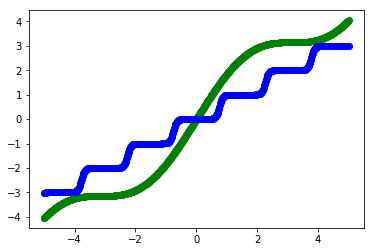

In [2]:
def func(x):
    return np.sin(x)+x

X = np.linspace(-5, 5, 1000)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None]).reshape((1,X.shape[1]))

M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,1))

minim = minimizer.SGD()
minim.train(mse(), M, X, Y, lr=0.1,maxiter=1000)

plt.plot(X.flatten(), Y.flatten(),"og-", label='fit')
plt.plot(X.flatten(), np.real(M.predict(X)).flatten(),"ob-", label='fit')

In [ ]:
def func(x1,x2):
    return 0.2*x1+0.4*x2+0.8

X1 = np.linspace(-5.3, 5, 1000)
X2 = np.linspace(-5.5, 5, 1000)

X = np.stack((X1,X2))

Y = func(X1[:,None],X2[:,None]).reshape((1,X1.shape[0]))

M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(2,1))
M.add(layers.DiagExpectationUnitLayer(1,1))


minim = minimizer.SGD()
minim.train(mse(), M, X, Y, lr=0.1,maxiter=400)

#plt.plot(X.flatten(), Y.flatten(),"og-", label='fit')
#plt.plot(X.flatten(), np.real(M.predict(X)).flatten(),"ob-", label='fit')

# Layer test

In [ ]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

In [ ]:
def func(x):
    return np.sin(x)

X = np.linspace(0, 10, 5)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None]).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
minim = minimizer.CMA(True)
minim.train(mse(), M, X, Y, tolfun=1e-3)

In [ ]:
npoints = 5
test_X = (np.linspace(0, 10, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Misc tests

In [ ]:
L = layers.MaxPosLayer(3,1)

In [ ]:
L.feedin(np.array([Y,2*Y,1*Y]).reshape(3,5))

In [ ]:
np.array([Y,2*Y,Y]).reshape(3,5)

In [ ]:
np.empty(0)

In [ ]:
derivative_1d_theta_phaseI([0.1],[1j],0)